In [241]:
# importing packages and modules

import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA


warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/Data_Science/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

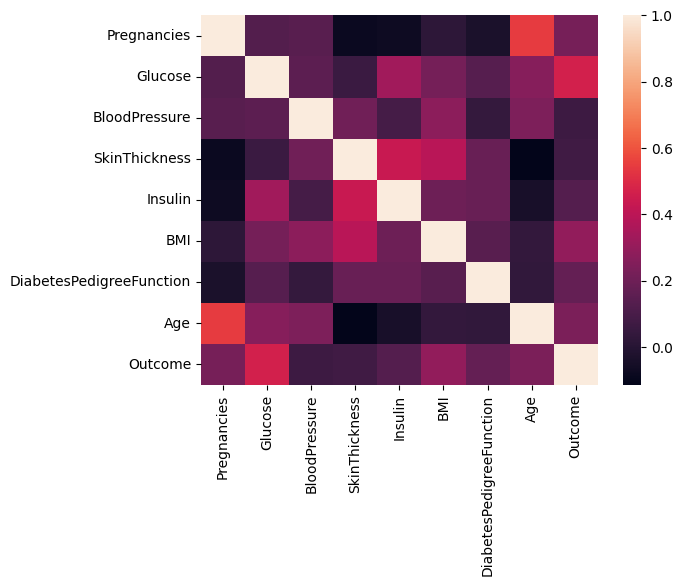

In [242]:
# Heatmap of the dataset

sns.heatmap(df.corr())

<Axes: xlabel='Outcome', ylabel='count'>

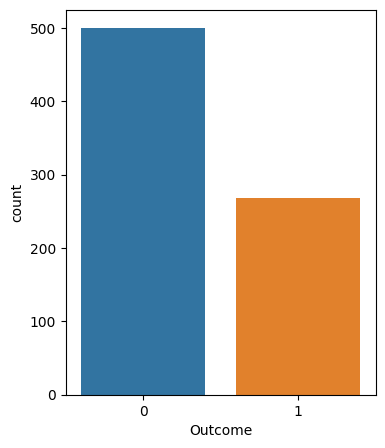

In [243]:
# image showing number of peoples having diabetes and not having diabetes
fig, ax = plt.subplots(figsize=(4, 5))
sns.countplot(x='Outcome',data=df,ax=ax)


In [244]:
# splitting the dataset into two using loc considering the age above 40 and below 40
df.value_counts('Age')
l=df.loc[df['Age'] < 40] 
h=df.loc[df['Age']>40]

<Axes: xlabel='Age', ylabel='count'>

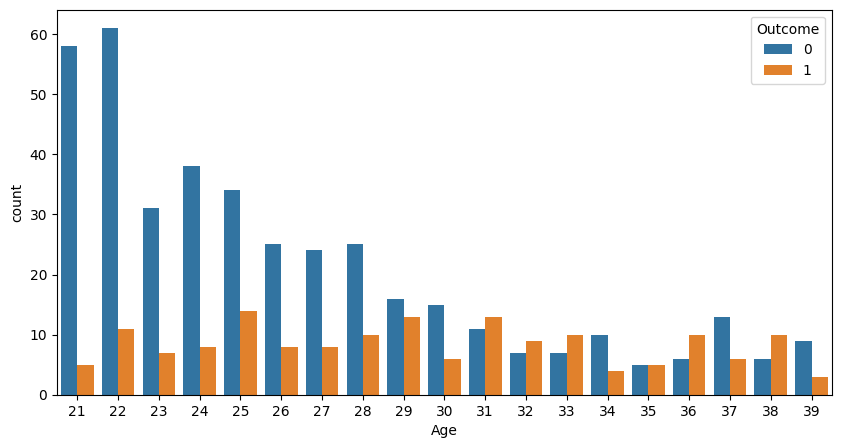

In [245]:
# image showing that certain age group below 40 having diabetes or not
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Age',data=l,hue='Outcome')

<Axes: xlabel='Age', ylabel='count'>

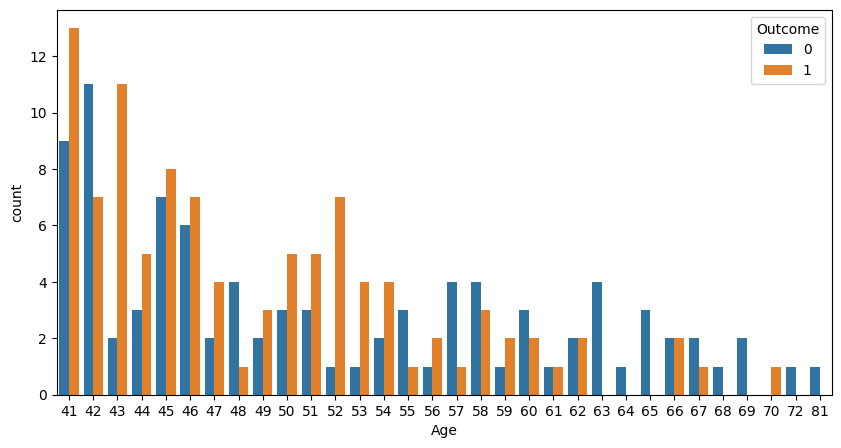

In [246]:
# image showing that certain age group above 40 having diabetes or not
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Age',data=h,hue='Outcome')

In [247]:
# giving variable name to labelencoder and standardscaler
le=LabelEncoder()
sc=StandardScaler()


In [248]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [249]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [250]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [251]:
#splitting to feature sectionn
X=df.iloc[:,:-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [252]:
#splitting to output section
y=df.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [253]:
#scaling the X values
X_new=sc.fit_transform(X)

In [254]:
# Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_new, y)

In [255]:
#Train_Test_Split
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=10)

In [256]:
# Using GridSearchCv
knn=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [257]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }
# rfc = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(rfc, param_grid, cv=10)
# grid_search.fit(X_train,y_train)
# print(grid_search.best_params_)

In [258]:
# Giving variable name to all models
knn=KNeighborsClassifier(algorithm ='auto',n_neighbors = 3,weights ='uniform')
svm=SVC(gamma='auto',kernel='rbf')
nb=GaussianNB()
rf=RandomForestClassifier(criterion= 'entropy', n_estimators= 20,random_state=2)
ad=AdaBoostClassifier(n_estimators=100)
dc=DecisionTreeClassifier(criterion= 'entropy',random_state= 5)

In [259]:

from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [260]:
# Running every models using forloop
lst2=[knn,svm,nb,rf,ad,dc]
for i in lst2:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))
  

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        93
           1       0.78      0.80      0.79       107

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.78      0.77       200

SVC(gamma='auto')
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        93
           1       0.76      0.81      0.79       107

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200

GaussianNB()
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        93
           1       0.76      0.68      0.72       107

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighte

KNeighborsClassifier(n_neighbors=3)
SVC(gamma='auto')


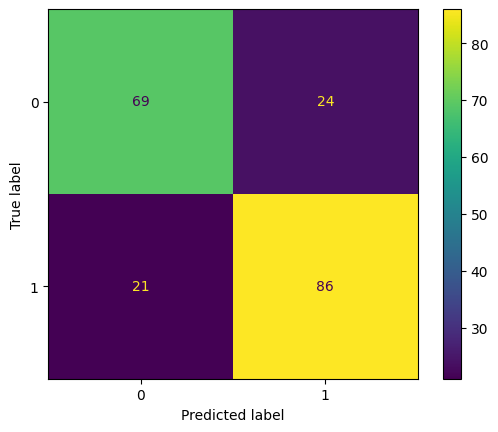

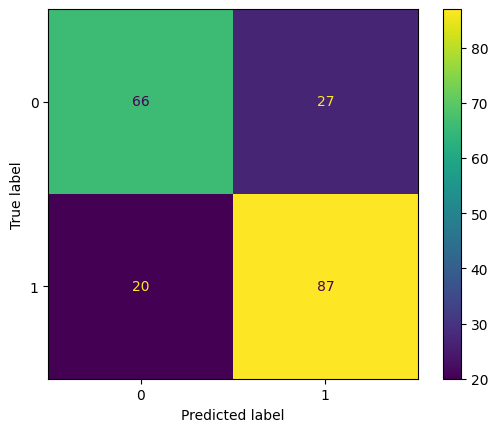

In [261]:
# Confusion Matrix Display of KNN,SVM
lst2=[knn,svm]
for i in lst2:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))



GaussianNB()
RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=2)


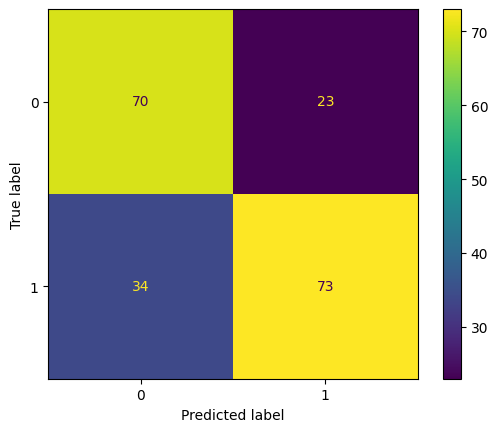

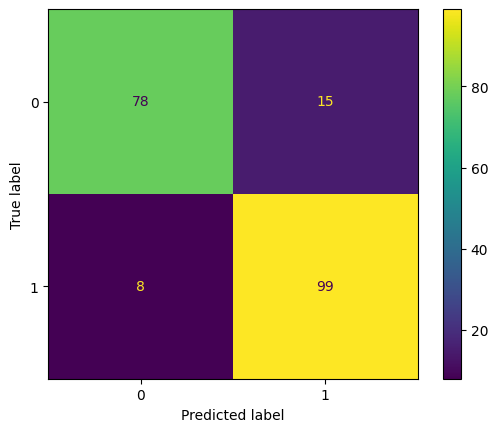

In [262]:
# Confusion Matrix Display of Naive Bayes and RandomForest
lst2=[nb,rf]
for i in lst2:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

AdaBoostClassifier(n_estimators=100)
DecisionTreeClassifier(criterion='entropy', random_state=5)


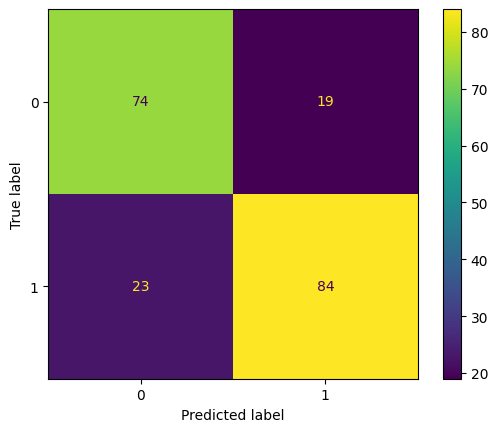

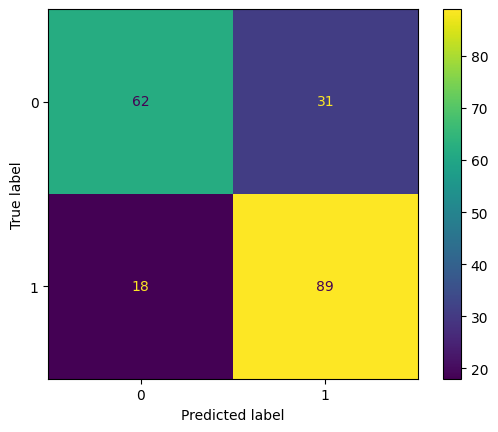

In [263]:
# Confusion Matrix Display Adaboost and Decision tree
lst2=[ad,dc]
for i in lst2:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [267]:
# Creating A New Dataset Using Precision Accuracy and Models

d={'Model':['K Neearest Neighbors','Support Vector Classifier','GaussianNB','Random Forest Classifier','AdaBoostClassifier','DecisionTreeClassifier'],'Prediction_Accuracy':[0.69,0.75,0.71,0.89,0.79,0.76]}
df_new=pd.DataFrame(d,index=[1,2,3,4,5,6],columns=['Model','Prediction_Accuracy'])
df_new.style.highlight_max(subset=['Prediction_Accuracy'],color='green')


,Model,Prediction_Accuracy
1,K Neearest Neighbors,0.690000
2,Support Vector Classifier,0.750000
3,GaussianNB,0.710000
4,Random Forest Classifier,0.890000
5,AdaBoostClassifier,0.790000
6,DecisionTreeClassifier,0.760000


In [265]:
df_new.style.highlight_min(subset=['Prediction_Accuracy'],color='red')

,Model,Prediction_Accuracy
1,K Neearest Neighbors,0.690000
2,Support Vector Classifier,0.750000
3,GaussianNB,0.710000
4,Random Forest Classifier,0.890000
5,AdaBoostClassifier,0.790000
6,DecisionTreeClassifier,0.760000


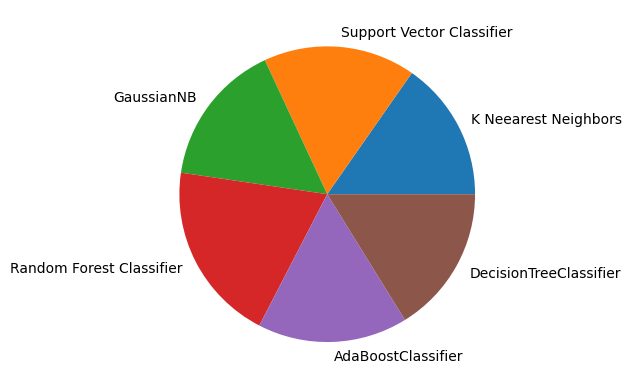

In [272]:
# pie chart

y=[69,75,71,89,74,73]
newlabels=['K Neearest Neighbors','Support Vector Classifier','GaussianNB','Random Forest Classifier','AdaBoostClassifier','DecisionTreeClassifier']
plt.pie(y,labels=newlabels)
plt.show()